# Data Analysis On Zomato

You can use Google Colab Notebook or Jupyter Notebook to simplify your task.

To address our analysis, we need to respond to the subsequent inquiries:

Do a greater number of restaurants provide online delivery as opposed to offline services?
Which types of restaurants are the most favored by the general public?
What price range is preferred by couples for their dinner at restaurants?

### Step 1: Import necessary Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zomato = pd.read_csv("Zomato_data.csv")
print(zomato.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Creating the new column "float_ratings" 
by converting the data type of the “rate” column to float and remove the denominator.

In [3]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

zomato['float_ratings']=zomato['rate'].apply(handleRate)
print(zomato.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  float_ratings  
0                          800          Buffet            4.1  
1                          800          Buffet            4.1  
2                          800          Buffet            3.8  
3                          300          Buffet            3.7  
4                          600          Buffet            3.8  


# Summary of Zomato

In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    object 
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
 7   float_ratings                148 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 9.4+ KB


# Conclusion:
There is no NULL value in zomato dataframe.

#### Que: 
The majority of the restaurants fall into which category?

Text(0.5, 0, 'Type of restaurant')

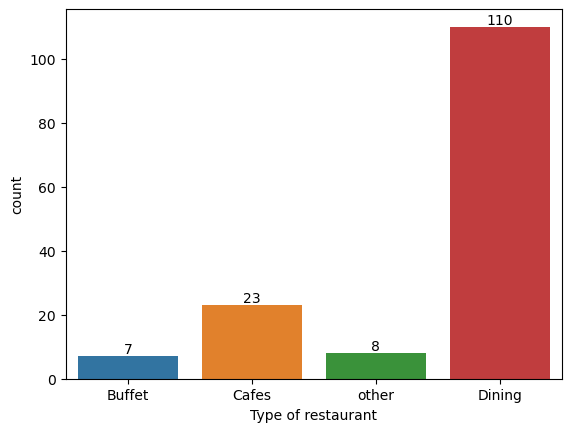

In [5]:
ax = sns.countplot(x='listed_in(type)', data=zomato)

for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Type of restaurant")


### Conclusion: The majority(110) of the restaurants fall into the dining category.


In [6]:
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0.5, 1.0, 'Restaurant Category By Votes')

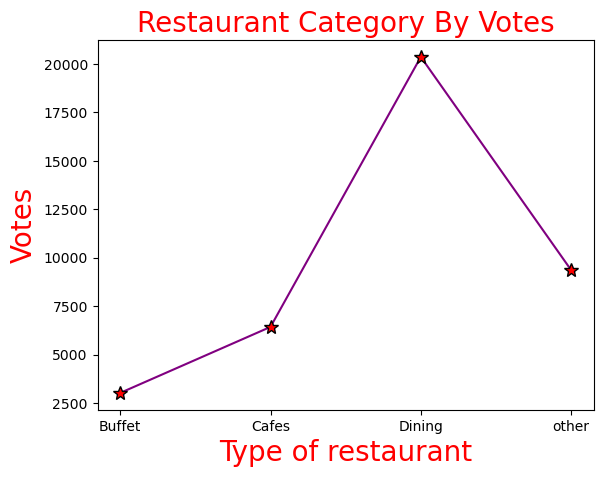

In [7]:
ax=plt.plot(result, c="purple", marker="*", ms=10, markeredgecolor='k',markerfacecolor='r')

plt.xlabel("Type of restaurant", c="r", size=20)
plt.ylabel("Votes", c="r", size=20)
plt.title("Restaurant Category By Votes", c="r", size=20)

### Conclusion: Dining restaurants are preferred by a larger number of individuals.

#### Que: 
Determine the restaurant's name taht recieved the maximum votes?

In [8]:
max_votes = zomato['votes'].max()
restaurant_with_max_votes = zomato.loc[zomato['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


#### Que: 
How many number of restaurants accept online orders?

or

Do a greater number of restaurants provide online delivery as opposed to offline services?

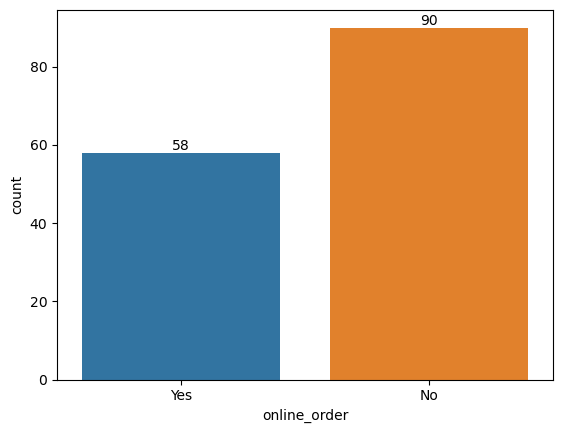

In [9]:
ax = sns.countplot(x=zomato['online_order'])

for bars in ax.containers:
    ax.bar_label(bars)

#### Conclusion: This chart suggests that a majority of the restaurants do not accept online orders.
#### Total 90 restaurants doesnot accept the online orders from as per the given dataset.

#### Que:
find out what kind of rating most probably given to the restaurants?

or 

Which types of restaurants are the most favored by the general public?

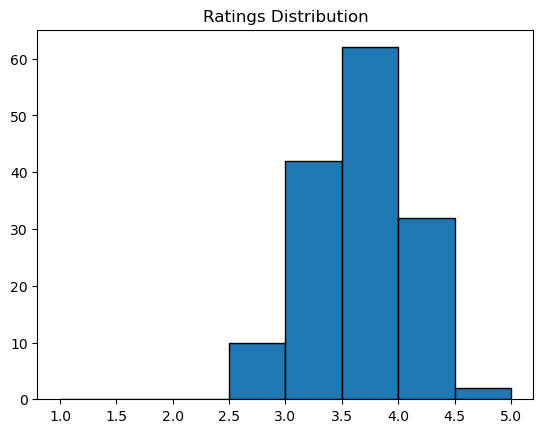

In [10]:
plt.hist(x=zomato.float_ratings, bins=[1,1.5,2,2.5,3,3.5,4,4.5,5], edgecolor='k')
plt.title("Ratings Distribution")
plt.show()

#### Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

#### Que: 
What price range is preferred by couples for their dinner at restaurants?

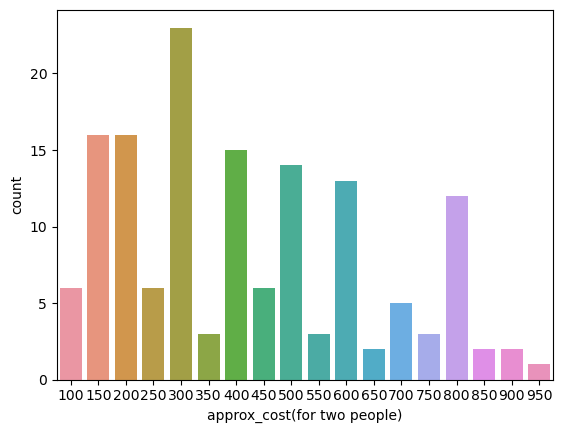

In [11]:
couple_data=zomato['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

#### Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

#### Que: examine whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='float_ratings'>

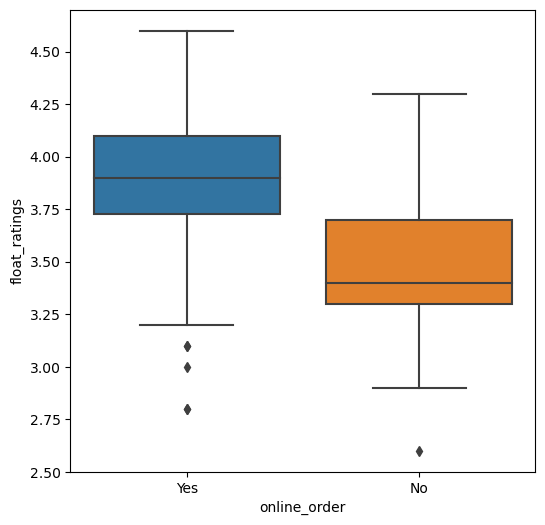

In [12]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'float_ratings', data = zomato)

#### CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

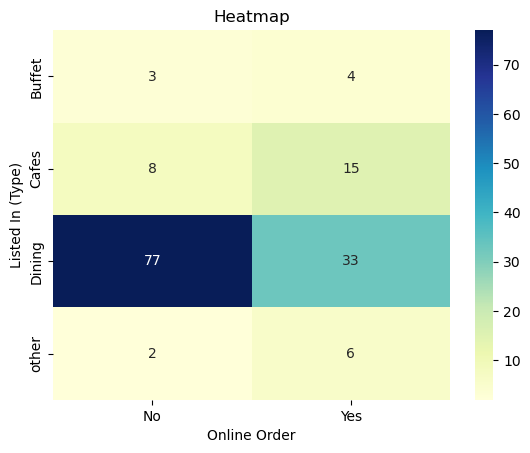

In [13]:
pivot_table = zomato.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

#### CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.